In [207]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [208]:
X_train = np.arange(10).reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1,2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0])

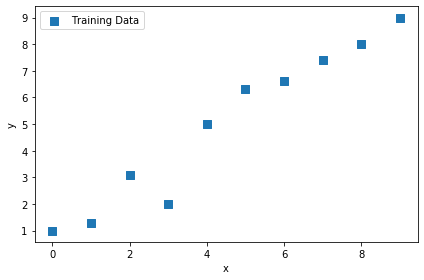

In [209]:
### 線形回帰モデルのプロット
# 訓練データ
plt.scatter(X_train, y_train, marker='s', s=50,label='Training Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()

In [210]:
class TfLinreg(object):
    
    def __init__(self, x_dim, learning_rate=0.01, random_seed=None):
        self.x_dim = x_dim
        self.learning_rate = learning_rate
        self.g = tf.Graph()
        
        with self.g.as_default():
            tf.set_random_seed(random_seed)
            self.build()
            
            # 変数のイニシャライザ
            self.init_op = tf.global_variables_initializer()
    
    def build(self):
        
        # プレースホルダ―を定義
        self.X = tf.placeholder(dtype=tf.float32, shape=(None,self.x_dim), name='x_input')
        self.y = tf.placeholder(dtype=tf.float32, shape=(None), name='y_input')
        
        # tf.zeros:要素が全て0の行列
        # 1×1のテンソル
        w = tf.Variable(tf.zeros(shape=(1)), name='weight')
        b = tf.Variable(tf.zeros(shape=(1)), name='bias')
        
        self.w = w
        self.b = b
        
        # 予測値を算出
        # tf.squeeze:1の次元を削除し、テンソルを1つ下げる関数
        self.test = w * self.X + b
        self.z_net = tf.squeeze(w * self.X + b, name='z_net')
        
        # 実績値-予測値
        # tf.square:要素ごとに2乗をとる
        sqr_errors = tf.square(self.y - self.z_net, name='sqr_errors')
        self.sqr_errors = sqr_errors
        
        # コスト関数
        # tf.reduce_mean:与えたリストに入っている数値の平均値を求める関数
        self.mean_cost = tf.reduce_mean(sqr_errors, name='mean_cost')
        
        ## オプティマイザを作成
        # GradientDescentOptimizer:急速降下法
        optimizer = tf.train.GradientDescentOptimizer(
            learning_rate=self.learning_rate,
            name='GradientDescent'
        )
        
        # 損失関数の勾配(重みと傾き)を計算
        self.optimizer = optimizer.minimize(self.mean_cost)

In [211]:
# モデルのインスタンス化
lrmodel = TfLinreg(x_dim=X_train.shape[1], learning_rate=0.01)

In [215]:
### 学習
# self.optimizer
def train_linreg(sess, model, X_train, y_train, num_epochs=10):
    # 変数の初期化
    sess.run(model.init_op)
    training_costs=[]

    # 同じX_trainを10回繰り返す
    for i in range(num_epochs):      
        """
        model.optimizer:急速降下法を適用する
        model.X:学習データ(階数2)
        model.y:正解データ(階数1)
        model.z_net:予測値(w * self.X + bから計算)
        model.sqr_errors:実績値-予測値の2乗
        model.mean_cost:2乗誤差の平均値
        model.w:更新後の重み
        model.b:更新後のバイアス
        """
        _,X,y,z_net,sql_errors,cost,w,b= sess.run([
            model.optimizer,
            model.X, 
            model.y,
            model.z_net, 
            model.sqr_errors,
            model.mean_cost,
            model.w, 
            model.b, 
        ],feed_dict={model.X:X_train, model.y:y_train}) # 同じのを10回繰り返す
        
        print('  ')
        print(X)
        print(y)
        print(z_net)
        print(sql_errors)
        print(cost)
        print(w)
        print(b)
        
        training_costs.append(cost)
        
    return training_costs

In [216]:
sess = tf.Session(graph=lrmodel.g)
training_costs = train_linreg(sess, lrmodel, X_train, y_train)

  
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]
 [6.]
 [7.]
 [8.]
 [9.]]
[1.  1.3 3.1 2.  5.  6.3 6.6 7.4 8.  9. ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 1.         1.6899998  9.61       4.        25.        39.690002
 43.559998  54.760002  64.        81.       ]
32.431
[0.60279995]
[0.09940001]
  
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]
 [6.]
 [7.]
 [8.]
 [9.]]
[1.  1.3 3.1 2.  5.  6.3 6.6 7.4 8.  9. ]
[0.09940001 0.70219994 1.305      1.9078     2.5105999  3.1133997
 3.7161999  4.319      4.9217997  5.5245996 ]
[8.1108040e-01 3.5736486e-01 3.2220249e+00 8.5008480e-03 6.1971130e+00
 1.0154423e+01 8.3163023e+00 9.4925632e+00 9.4753170e+00 1.2078408e+01]
6.0113096
[0.853058]
[0.14256]
  
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]
 [6.]
 [7.]
 [8.]
 [9.]]
[1.  1.3 3.1 2.  5.  6.3 6.6 7.4 8.  9. ]
[0.14256   0.995618  1.848676  2.701734  3.554792  4.40785   5.260908
 6.113966  6.967024  7.8200817]
[0.7352033  0.09264838 1.5658116  0.4924307  2.0886264  3.580233
 1.7931668  1.6538837  1.0670397  1.3922071 ]
1.4461

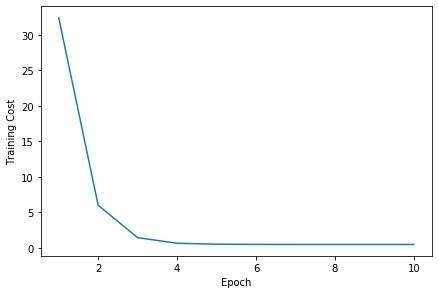

In [214]:
plt.plot(range(1,len(training_costs) + 1), training_costs)
plt.tight_layout()
plt.xlabel('Epoch')
plt.ylabel('Training Cost')
#plt.savefig('images/13_01.png', dpi=300)
plt.show()

In [203]:
### 予測
# model.z_net
def predict_linreg(sess, model, X_test):
    y_pred = sess.run(model.z_net, feed_dict={model.X:X_test})
    return y_pred

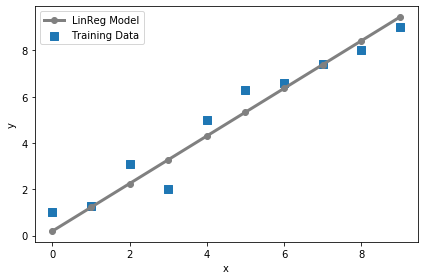

In [204]:
### 線形回帰モデルのプロット
# 訓練データ
plt.scatter(X_train, y_train, marker='s', s=50,label='Training Data')

# 訓練データを使って出力した線形回帰モデル
plt.plot(range(X_train.shape[0]), predict_linreg(sess, lrmodel, X_train),color='gray'
         , marker='o', markersize=6, linewidth=3,label='LinReg Model')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()